# Predicting Term Deposit Subscription Using Machine Learning

## Introduction

In today’s data-driven banking environment, improving the effectiveness of customer outreach is both a strategic goal and an operational necessity. Traditional marketing campaigns for term deposit products often involve contacting thousands of customers with only a small fraction converting into actual subscribers. This results in low efficiency, increased costs, and potential customer fatigue.

**This project aims to solve that problem by using machine learning to predict which customers are most likely to subscribe to a term deposit before making contact.** We leveraged customer demographic data, past campaign outcomes, economic indicators, and behavioral patterns to build a predictive model that enhances marketing precision.

Our solution not only improves campaign return on investment (ROI) but also ensures ethical targeting and supports regulatory compliance. This report outlines our end-to-end process, key findings, and actionable business recommendations in a format tailored for non-technical stakeholders.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [6]:
df = pd.read_csv('bank-additional-full.csv', delimiter = ';')

In [7]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [8]:
print("Total Columns", df.shape[1])

Total Columns 21


In [9]:
features = df.drop(columns=['y'])
print("Number of features: ", features.shape[1])

Number of features:  20


We only want to keep original 16 features

In [10]:
# define original 16 features from df
original_16_features = [
    'age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
    'contact', 'month', 'duration', 'campaign', 'pdays', 'previous',
    'poutcome', 'emp.var.rate', 'cons.price.idx'
]

# create new df with only these features and target variable
df_16 = df[original_16_features + ['y']]

In [11]:
df_16.head()


,age,job,marital,education,default,housing,loan,contact,month,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,261,1,999,0,nonexistent,1.1,93.994,no
1,57,services,married,high.school,unknown,no,no,telephone,may,149,1,999,0,nonexistent,1.1,93.994,no
2,37,services,married,high.school,no,yes,no,telephone,may,226,1,999,0,nonexistent,1.1,93.994,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,151,1,999,0,nonexistent,1.1,93.994,no
4,56,services,married,high.school,no,no,yes,telephone,may,307,1,999,0,nonexistent,1.1,93.994,no


In [12]:
# seperate features and target
X_16 = df_16.drop(columns=['y'])
y_16 = df_16['y']

In [13]:
# check for missing values
print(X_16.isna().sum())

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
dtype: int64


Model 1 Full One Hot Encode brings features to 55. (Better for tree-based, trees handlu redundancy well)

Model 2 Reduced One Hot Encode (Better for clustering, less dimensional noise)

In [14]:
# id and one hot encode categorical variables
categorical_cols = X_16.select_dtypes(include= ['object']).columns.tolist()
model1 = pd.get_dummies(X_16, columns=categorical_cols, drop_first=False)
model2 = pd.get_dummies(X_16, columns=categorical_cols, drop_first=True)

In [15]:
print(model1.shape[1])
print(model2.shape[1])

55
46


In [16]:
model1.head()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,job_admin.,job_blue-collar,job_entrepreneur,...,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_nonexistent,poutcome_success
0,56,261,1,999,0,1.1,93.994,False,False,False,...,False,False,False,True,False,False,False,False,True,False
1,57,149,1,999,0,1.1,93.994,False,False,False,...,False,False,False,True,False,False,False,False,True,False
2,37,226,1,999,0,1.1,93.994,False,False,False,...,False,False,False,True,False,False,False,False,True,False
3,40,151,1,999,0,1.1,93.994,True,False,False,...,False,False,False,True,False,False,False,False,True,False
4,56,307,1,999,0,1.1,93.994,False,False,False,...,False,False,False,True,False,False,False,False,True,False


In [17]:
model2.head()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,job_blue-collar,job_entrepreneur,job_housemaid,...,month_dec,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_nonexistent,poutcome_success
0,56,261,1,999,0,1.1,93.994,False,False,True,...,False,False,False,False,True,False,False,False,True,False
1,57,149,1,999,0,1.1,93.994,False,False,False,...,False,False,False,False,True,False,False,False,True,False
2,37,226,1,999,0,1.1,93.994,False,False,False,...,False,False,False,False,True,False,False,False,True,False
3,40,151,1,999,0,1.1,93.994,False,False,False,...,False,False,False,False,True,False,False,False,True,False
4,56,307,1,999,0,1.1,93.994,False,False,False,...,False,False,False,False,True,False,False,False,True,False


In [18]:
# Save to csv for model 1 supervised model
df_model1 = model1.copy()
df_model1['y'] = y_16
df_model1.to_csv('df_model1.csv', index=False)

In [19]:
# Save to csv for model 2 unsupervised model
df_model2 = model2.copy()
model2.to_csv('df_model2.csv', index=False)

Now let's perform some EDA
Distribution of Target Variable (y)

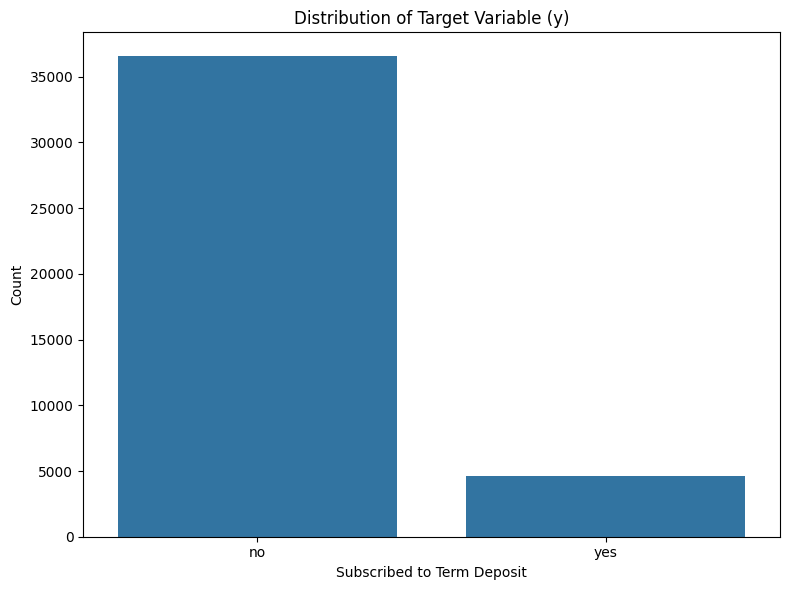

In [20]:
# Distribution of target variable
plt.figure(figsize=(8,6))
sns.countplot(x=y_16)
plt.title("Distribution of Target Variable (y)")
plt.xlabel("Subscribed to Term Deposit")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

Boxplot of age by Target Variable

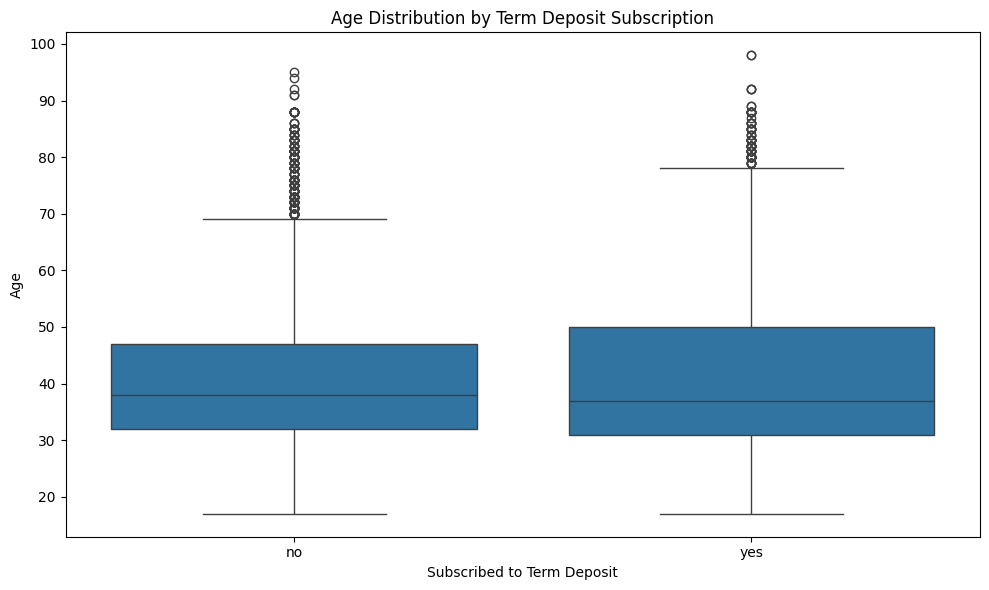

In [21]:
plt.figure(figsize=(10,6))
sns.boxplot(x=y_16, y=X_16['age'])
plt.title("Age Distribution by Term Deposit Subscription")
plt.xlabel("Subscribed to Term Deposit")
plt.ylabel("Age")
plt.tight_layout()
plt.show()

 Countplot of education levels

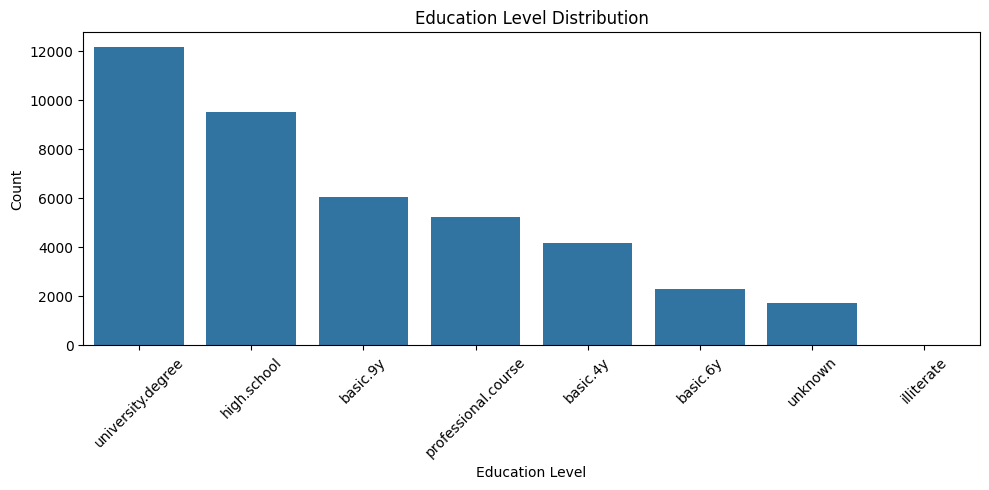

In [22]:
plt.figure(figsize=(10,5))
sns.countplot(data=X_16, x='education', order=X_16['education'].value_counts().index)
plt.title("Education Level Distribution")
plt.xticks(rotation=45)
plt.xlabel("Education Level")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

Top 20 Correlation Heatmap of All Encoded Features

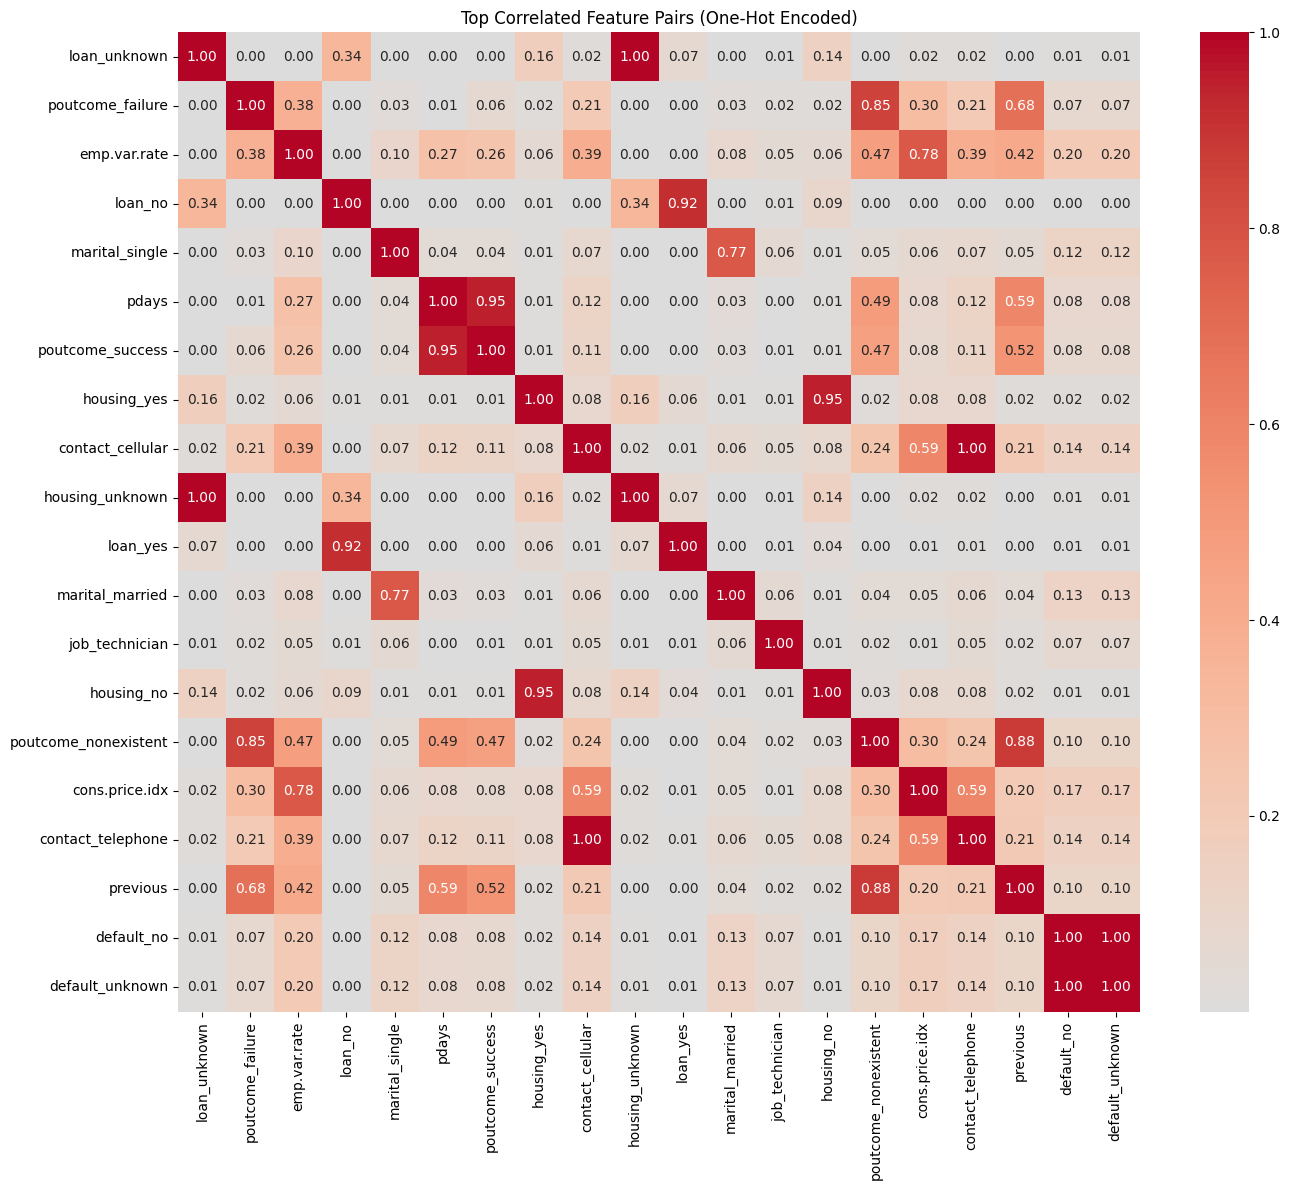

In [24]:
plt.figure(figsize=(14, 12))
corr_matrix = model1.corr().abs()
mask = np.triu(np.ones(corr_matrix.shape), k=1).astype(bool)
upper_tri = corr_matrix.where(mask)

sorted_pairs = (
    upper_tri.stack().sort_values(ascending=False)
)
top_features = set()
for i, j in sorted_pairs.index:
  if len(top_features) >= 20:
    break
  top_features.add(i)
  if len(top_features) >= 20:
    break
  top_features.add(j)


filtered_corr = corr_matrix.loc[list(top_features), list(top_features)]
sns.heatmap(filtered_corr, annot=True, cmap="coolwarm", fmt='.2f', center=0)
plt.title("Top Correlated Feature Pairs (One-Hot Encoded)")
plt.tight_layout()
plt.show()

In [25]:
df_model1

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,job_admin.,job_blue-collar,job_entrepreneur,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_nonexistent,poutcome_success,y
0,56,261,1,999,0,1.1,93.994,False,False,False,...,False,False,True,False,False,False,False,True,False,no
1,57,149,1,999,0,1.1,93.994,False,False,False,...,False,False,True,False,False,False,False,True,False,no
2,37,226,1,999,0,1.1,93.994,False,False,False,...,False,False,True,False,False,False,False,True,False,no
3,40,151,1,999,0,1.1,93.994,True,False,False,...,False,False,True,False,False,False,False,True,False,no
4,56,307,1,999,0,1.1,93.994,False,False,False,...,False,False,True,False,False,False,False,True,False,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,334,1,999,0,-1.1,94.767,False,False,False,...,False,False,False,True,False,False,False,True,False,yes
41184,46,383,1,999,0,-1.1,94.767,False,True,False,...,False,False,False,True,False,False,False,True,False,no
41185,56,189,2,999,0,-1.1,94.767,False,False,False,...,False,False,False,True,False,False,False,True,False,no
41186,44,442,1,999,0,-1.1,94.767,False,False,False,...,False,False,False,True,False,False,False,True,False,yes


In [26]:
df_model2

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,job_blue-collar,job_entrepreneur,job_housemaid,...,month_dec,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_nonexistent,poutcome_success
0,56,261,1,999,0,1.1,93.994,False,False,True,...,False,False,False,False,True,False,False,False,True,False
1,57,149,1,999,0,1.1,93.994,False,False,False,...,False,False,False,False,True,False,False,False,True,False
2,37,226,1,999,0,1.1,93.994,False,False,False,...,False,False,False,False,True,False,False,False,True,False
3,40,151,1,999,0,1.1,93.994,False,False,False,...,False,False,False,False,True,False,False,False,True,False
4,56,307,1,999,0,1.1,93.994,False,False,False,...,False,False,False,False,True,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,334,1,999,0,-1.1,94.767,False,False,False,...,False,False,False,False,False,True,False,False,True,False
41184,46,383,1,999,0,-1.1,94.767,True,False,False,...,False,False,False,False,False,True,False,False,True,False
41185,56,189,2,999,0,-1.1,94.767,False,False,False,...,False,False,False,False,False,True,False,False,True,False
41186,44,442,1,999,0,-1.1,94.767,False,False,False,...,False,False,False,False,False,True,False,False,True,False


In [27]:
print("Total Columns Model 1 df: ", df_model1.shape[1])
print("Total Columns Model 2 df: ", df_model2.shape[1])


Total Columns Model 1 df:  56
Total Columns Model 2 df:  46


In [31]:
df_model_hot_encoded = df_model1

In [32]:
df_model_hot_encoded.head()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,job_admin.,job_blue-collar,job_entrepreneur,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_nonexistent,poutcome_success,y
0,56,261,1,999,0,1.1,93.994,False,False,False,...,False,False,True,False,False,False,False,True,False,no
1,57,149,1,999,0,1.1,93.994,False,False,False,...,False,False,True,False,False,False,False,True,False,no
2,37,226,1,999,0,1.1,93.994,False,False,False,...,False,False,True,False,False,False,False,True,False,no
3,40,151,1,999,0,1.1,93.994,True,False,False,...,False,False,True,False,False,False,False,True,False,no
4,56,307,1,999,0,1.1,93.994,False,False,False,...,False,False,True,False,False,False,False,True,False,no


In [36]:
cols_to_plot = [
    'age',  # age of client
    'duration',  # last contact duration in seconds (very skewed, most predictive)
    'campaign',  # number of contacts during campaign
    'pdays',  # days since last contact (999 = never contacted)
    'previous',  # number of contacts before this campaign
    'emp.var.rate',  # employment variation rate (economic indicator)
    'cons.price.idx'  # consumer price index (economic indicator)
]

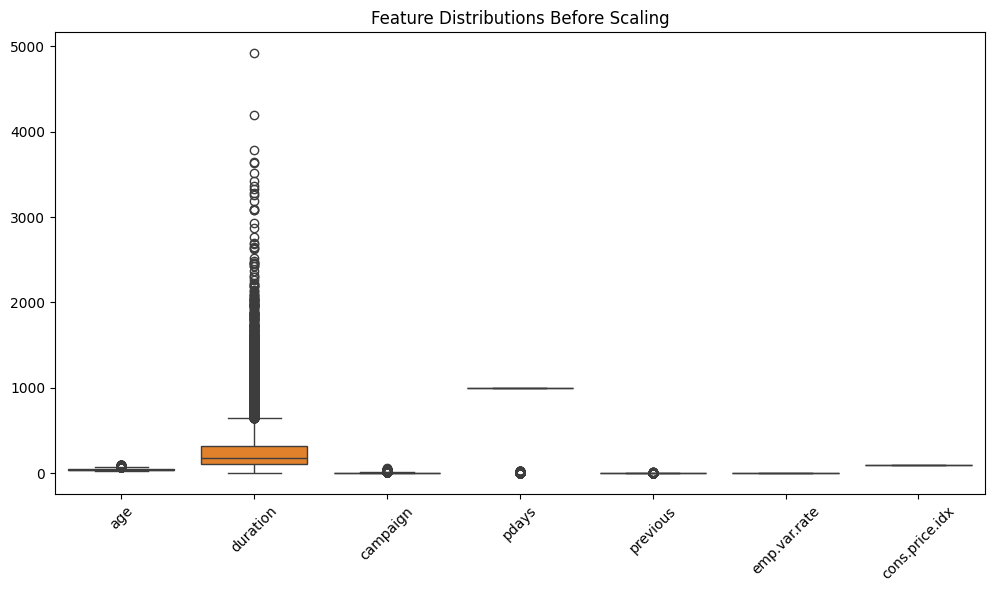

In [37]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_model_hot_encoded[cols_to_plot])
plt.title("Feature Distributions Before Scaling")
plt.xticks(rotation=45)
plt.show()

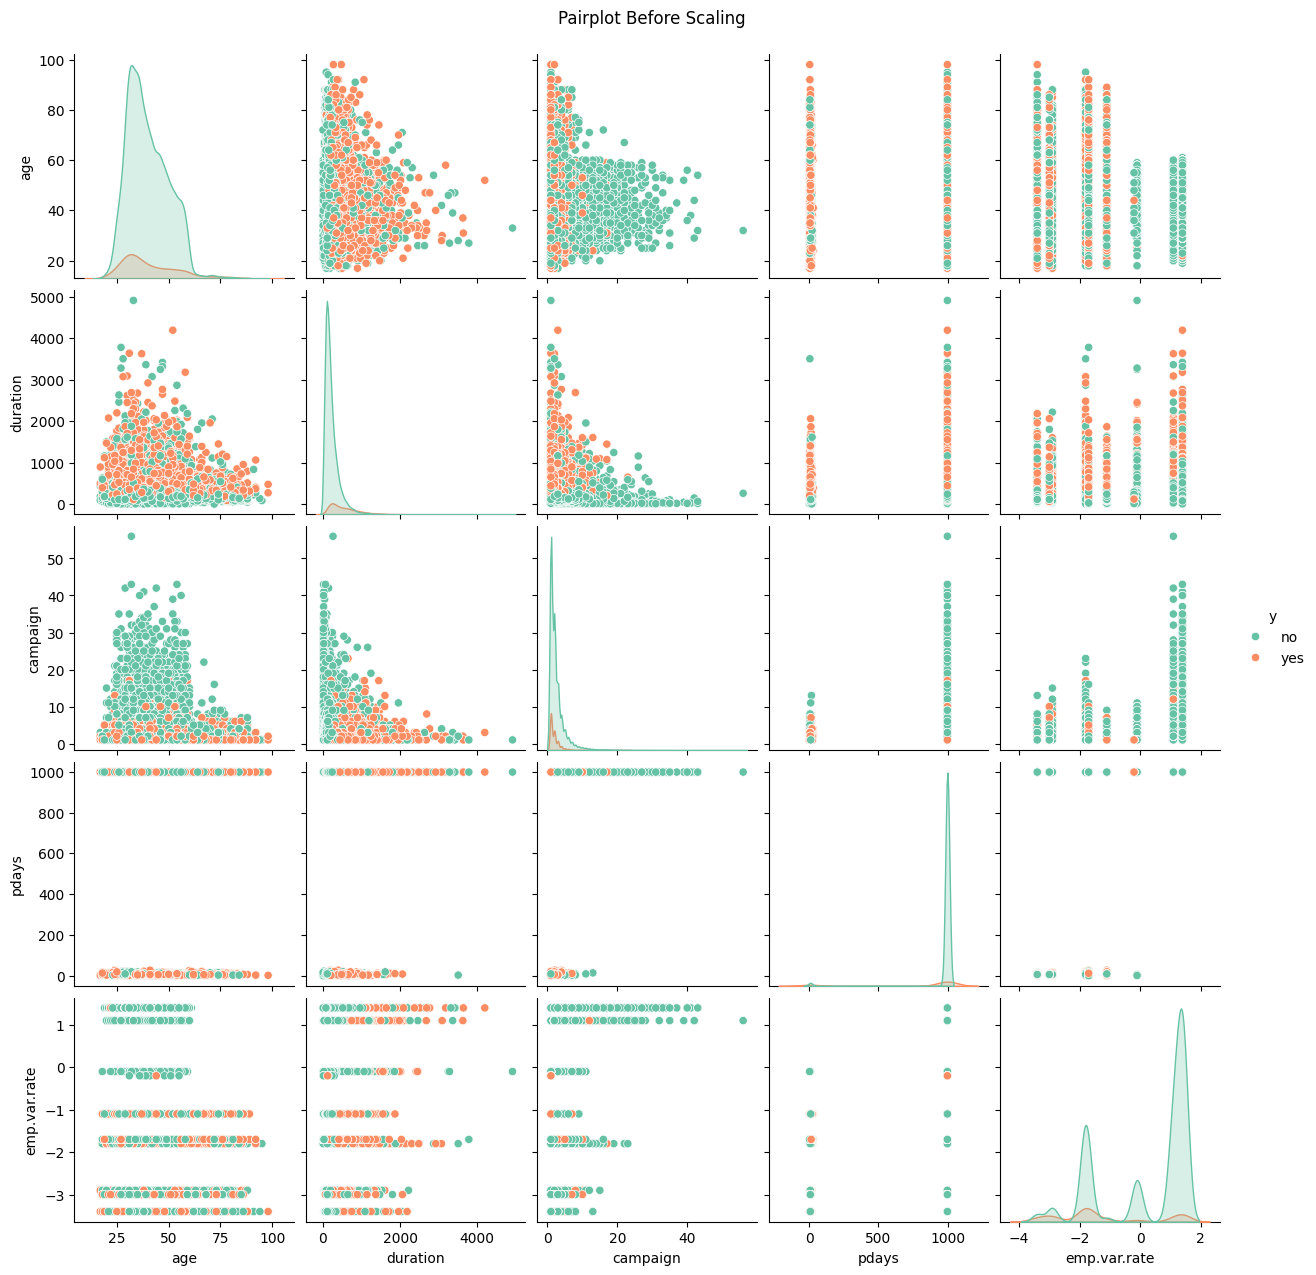

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt
# Subset dataframe
cols_pairplot = ['age', 'duration', 'campaign', 'pdays', 'emp.var.rate', 'y']
df_pair = df_model_hot_encoded[cols_pairplot]

# Plot
sns.pairplot(df_pair, hue='y', palette='Set2', diag_kind='kde')
plt.suptitle("Pairplot Before Scaling", y=1.02)
plt.show()

In [33]:
# Separate features and target variable for the hot encoded model
X = df_model_hot_encoded.drop('y', axis=1)
y = df_model_hot_encoded['y']

In [41]:
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Scale selected features only
scaler = StandardScaler()
X_scaled_subset = pd.DataFrame(scaler.fit_transform(X[cols_to_plot]),
                               columns=cols_to_plot)

# Add target variable for pairplot
X_scaled_subset['y'] = y.values

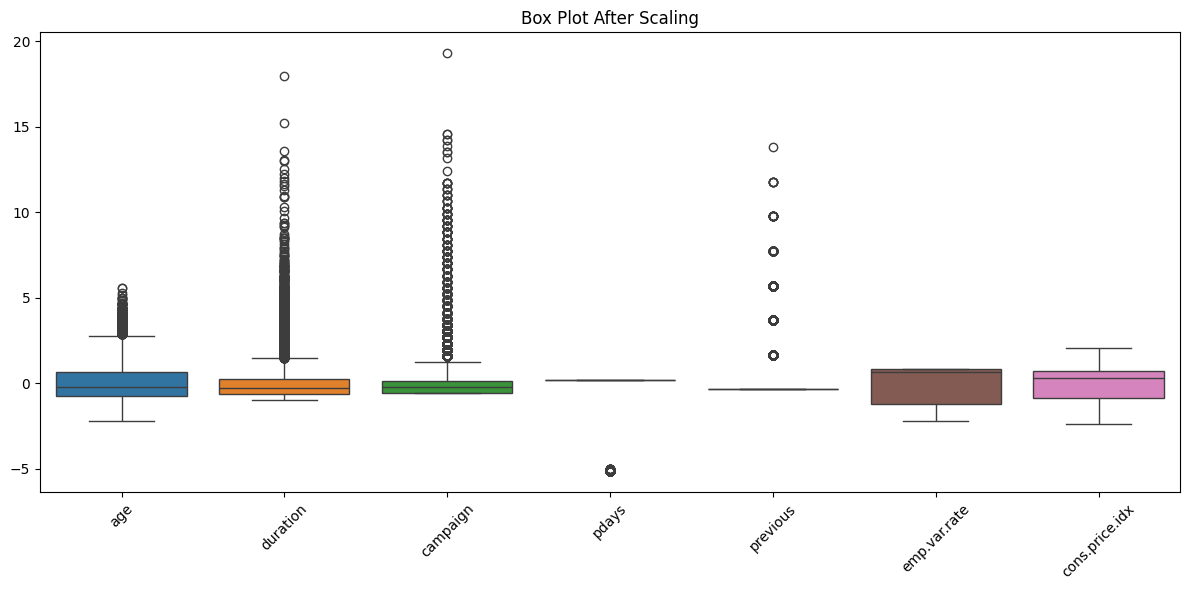

In [42]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.boxplot(data=X_scaled_subset[cols_to_plot])
plt.title("Box Plot After Scaling")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

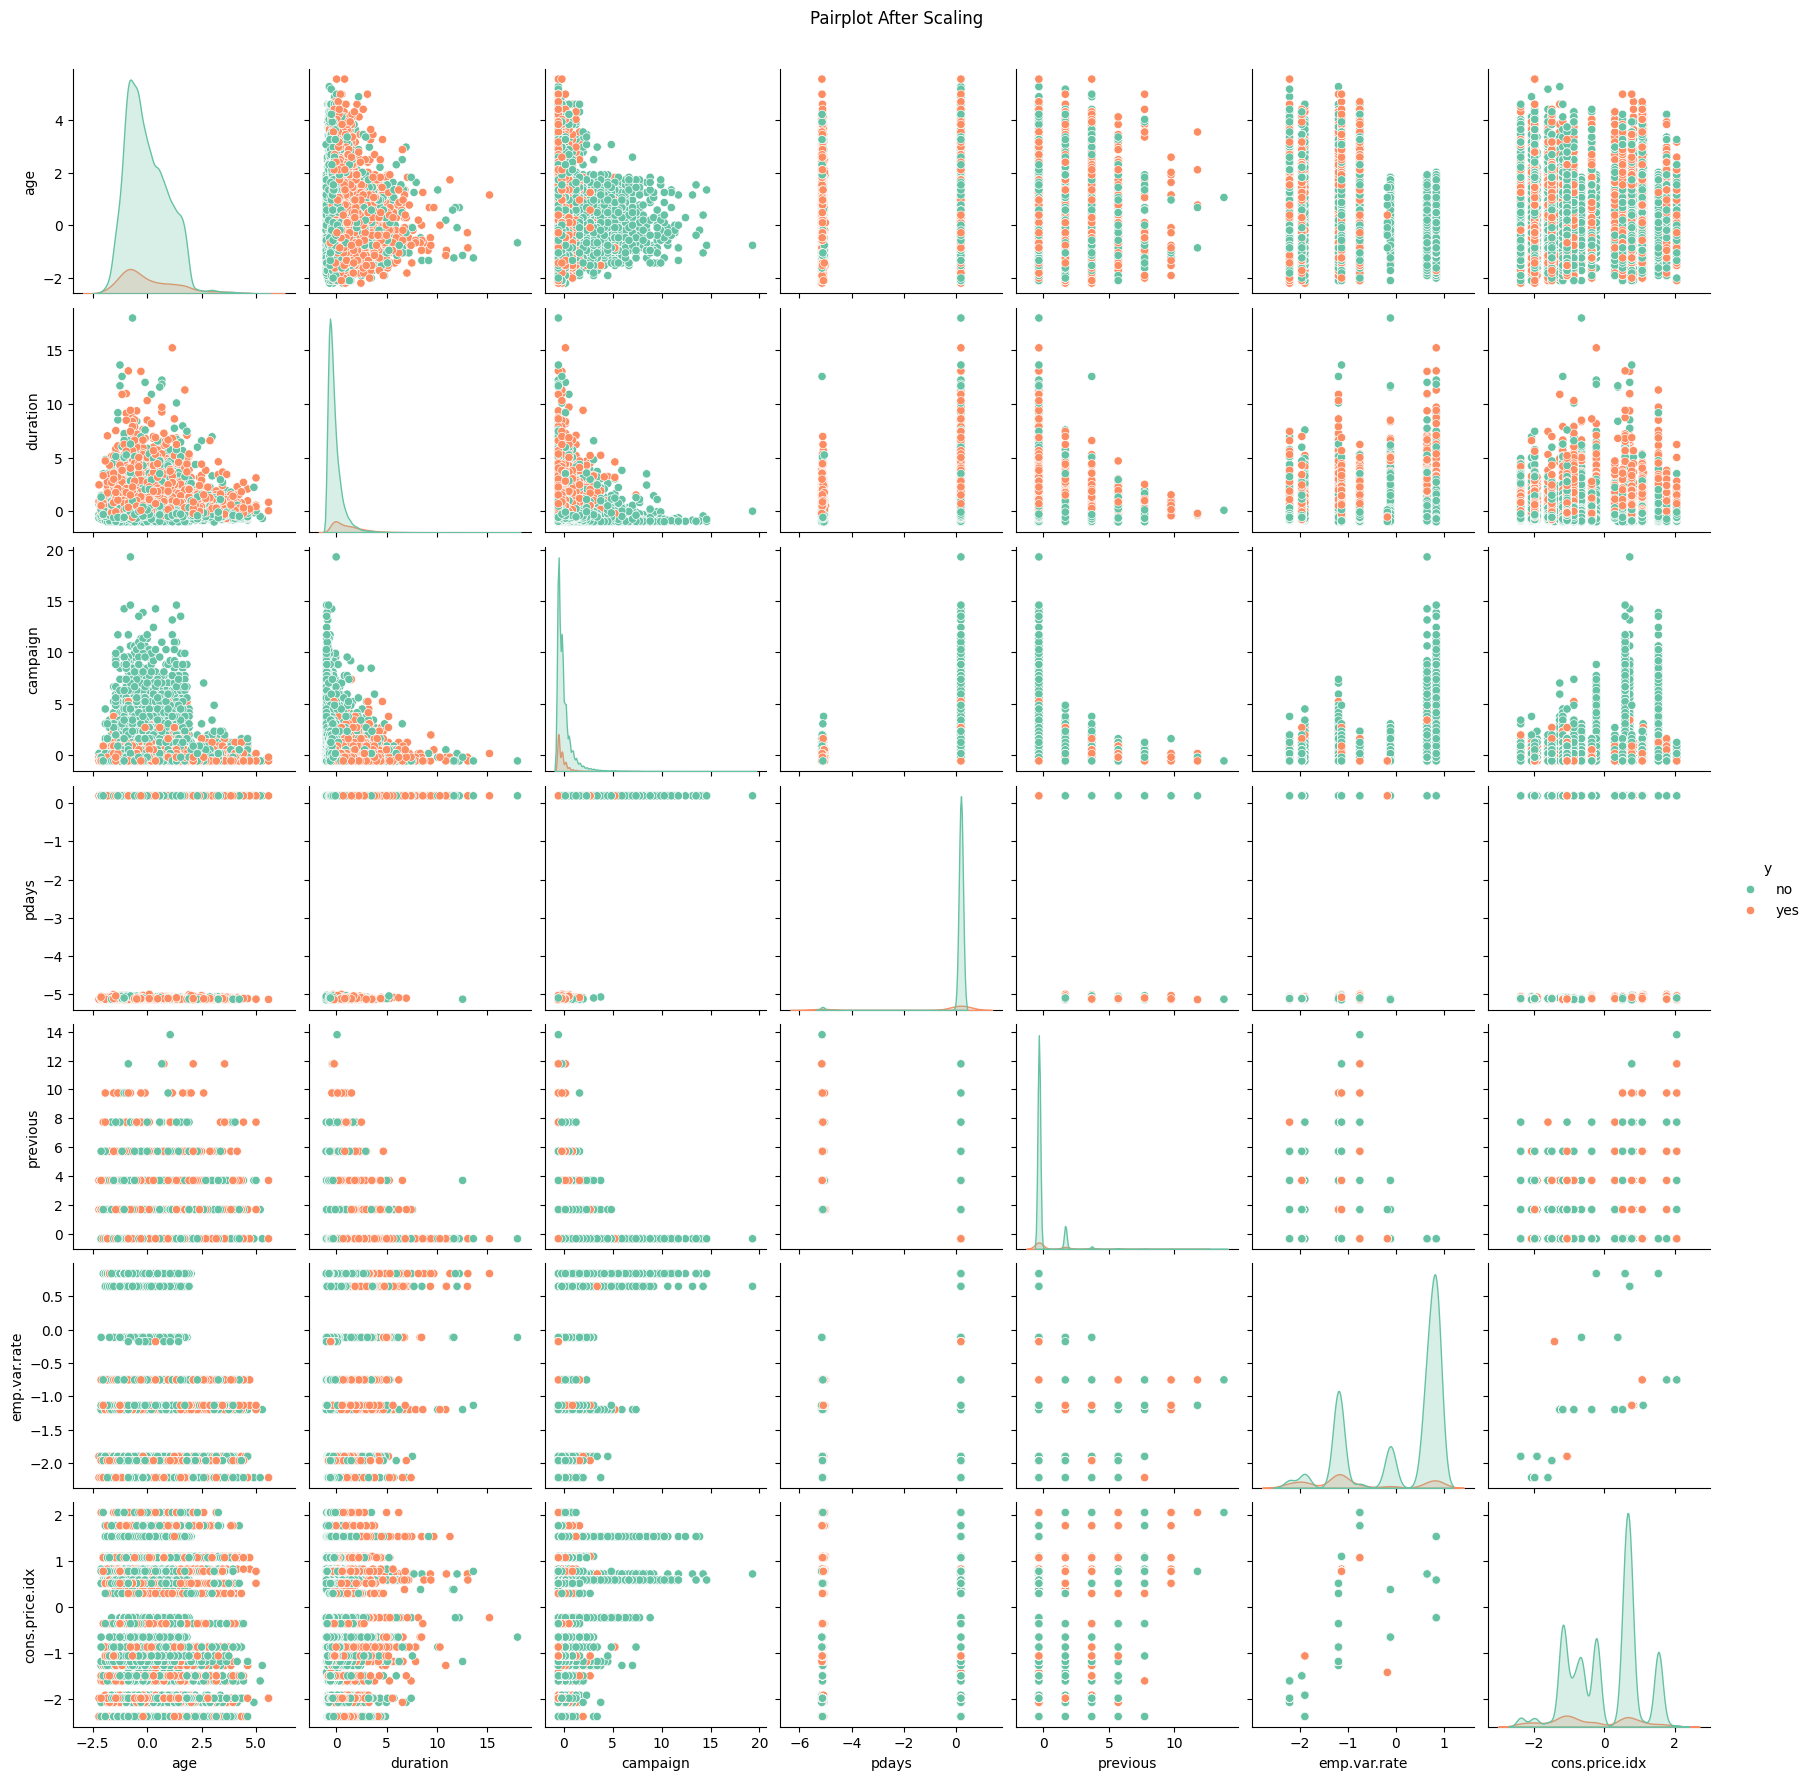

In [43]:
sns.pairplot(X_scaled_subset, hue='y', palette='Set2', diag_kind='kde')
plt.suptitle("Pairplot After Scaling", y=1.02)
plt.show()

In [44]:
# Scale the features using StandardScaler
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [46]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import pandas as pd
import matplotlib.pyplot as plt


# KMeans wrapper function
def kmeans_execution(df, num_clust):
    kmn = KMeans(n_clusters=num_clust, n_init='auto', random_state=0)
    kmn.fit(df)
    return kmn, kmn.labels_, kmn.inertia_

### Why We Used Clustering (KMeans)

Before building the prediction model, we used **clustering** to group customers based on similar behaviors and characteristics. This helped us uncover hidden patterns in the data — such as groups of customers who behave alike but respond differently to marketing.

By assigning each customer to a cluster, we created a new feature that adds strategic value to the model. This helps the bank better understand customer segments and tailor outreach strategies accordingly.

In [47]:
# Fill missing values with mean for scaled data
scaled_df_filled = pd.DataFrame(X_scaled).fillna(X_scaled.mean())

k_values = range(2, 7)
silhouette_scores = {}
kmeans_models = {}
kmeans_labels = {}

for k in k_values:
    model, labels, inertia = kmeans_execution(scaled_df_filled, k)
    score = silhouette_score(scaled_df_filled, labels)

    silhouette_scores[k] = score
    kmeans_models[k] = model
    kmeans_labels[k] = labels

    print(f'k={k} silhouette average score: {score:.4f}')

k=2 silhouette average score: 0.2903
k=3 silhouette average score: 0.0811
k=4 silhouette average score: 0.0703
k=5 silhouette average score: 0.0739
k=6 silhouette average score: 0.0690


In [48]:
from sklearn.decomposition import PCA

# Reduce to ~95% variance explained
pca = PCA(n_components=0.95, random_state=42)
X_pca = pca.fit_transform(scaled_df_filled)

print(f"PCA reduced dimensions: {X_pca.shape[1]}")

PCA reduced dimensions: 37


In [49]:
model_pca, labels_pca, _ = kmeans_execution(X_pca, 2)
score_pca = silhouette_score(X_pca, labels_pca)
print(f'k=2 silhouette score after PCA: {score_pca:.4f}')

k=2 silhouette score after PCA: 0.3010


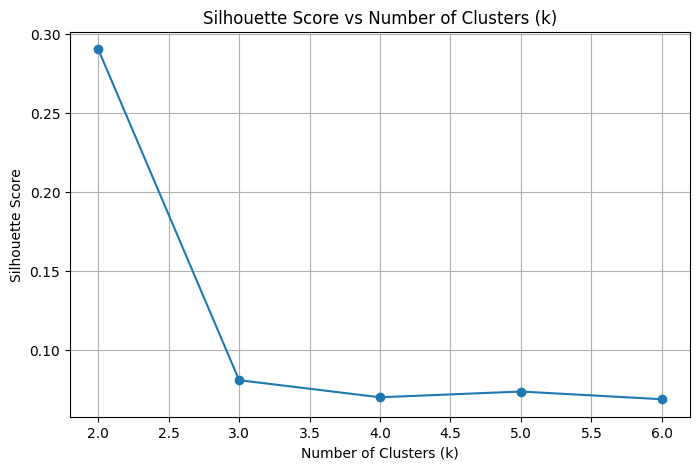

In [50]:
plt.figure(figsize=(8, 5))
plt.plot(list(silhouette_scores.keys()),
         list(silhouette_scores.values()),
         marker='o')
plt.title("Silhouette Score vs Number of Clusters (k)")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Silhouette Score")
plt.grid(True)
plt.show()

In [51]:
final_cluster_labels = labels_pca
X['cluster'] = final_cluster_labels

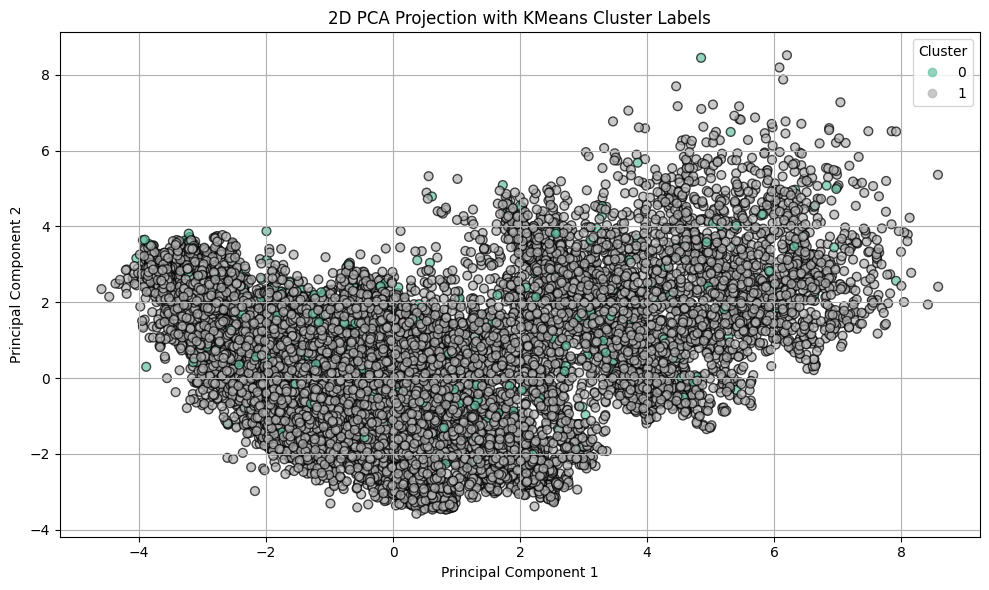

In [52]:
import matplotlib.pyplot as plt

# Make sure you are using only the first two principal components
pc1 = X_pca[:, 0]
pc2 = X_pca[:, 1]

plt.figure(figsize=(10, 6))
scatter = plt.scatter(pc1,
                      pc2,
                      c=final_cluster_labels,
                      cmap='Set2',
                      s=40,
                      alpha=0.7,
                      edgecolors='k')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('2D PCA Projection with KMeans Cluster Labels')
plt.grid(True)

# Optional: add cluster legend
plt.legend(*scatter.legend_elements(), title="Cluster")
plt.tight_layout()
plt.show()

### PCA + KMeans Cluster Visualization Analysis

To better understand the structure of the data, we applied **Principal Component Analysis (PCA)** to reduce dimensionality and visualize the clusters formed by **KMeans (k=2)** in 2D space.

#### Observations from the Plot:
- The data shows a **curved, non-linear structure** in the 2D PCA projection, indicating that PCA successfully captured major variance directions.
- The **KMeans clustering** resulted in two groups:
  - **Cluster 1 (dominant)** contains the majority of data points.
  - **Cluster 0 (sparser)** is scattered but appears to capture distinct behaviors embedded across the main data mass.

#### Cluster Evaluation:
- The **silhouette score (~0.3010)** after PCA indicates **moderate cluster quality** — better than random assignment, but not clearly separated.
- The **visual distribution** supports this, showing some cohesion within clusters, but also significant overlap.

#### Conclusion:
- The `cluster` feature derived from PCA+KMeans captures **latent group behavior** and is a valuable addition to the predictive model.
- Though the clusters are not sharply separated, this high-level structure may improve model generalization when combined with other engineered features in XGBoost.

In [53]:
X.head()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,job_admin.,job_blue-collar,job_entrepreneur,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_nonexistent,poutcome_success,cluster
0,56,261,1,999,0,1.1,93.994,False,False,False,...,False,False,True,False,False,False,False,True,False,1
1,57,149,1,999,0,1.1,93.994,False,False,False,...,False,False,True,False,False,False,False,True,False,1
2,37,226,1,999,0,1.1,93.994,False,False,False,...,False,False,True,False,False,False,False,True,False,1
3,40,151,1,999,0,1.1,93.994,True,False,False,...,False,False,True,False,False,False,False,True,False,1
4,56,307,1,999,0,1.1,93.994,False,False,False,...,False,False,True,False,False,False,False,True,False,1


### Why We Chose XGBoost for This Business Problem

We selected **XGBoost** because it is highly effective at identifying patterns in complex customer data. For the bank, this means we can make accurate predictions about which customers are most likely to subscribe to a term deposit — without relying on manual rules or assumptions.

XGBoost is fast, scalable, and handles messy, real-world data well. Most importantly, it gives us clear insights into which customer characteristics (like call duration, timing, or past behavior) influence their decisions — making the results both actionable and explainable for business teams.

In [57]:
# Convert 'yes'/'no' to 1/0
y = y.map({'no': 0, 'yes': 1})

In [58]:
from imblearn.over_sampling import SMOTE
from collections import Counter

# Check original balance
print("Original class distribution:", Counter(y))

# Apply SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Check new balance
print("After SMOTE:", Counter(y_resampled))

Original class distribution: Counter({0: 36548, 1: 4640})
After SMOTE: Counter({0: 36548, 1: 36548})


In [59]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_resampled,
                                                    y_resampled,
                                                    test_size=0.2,
                                                    stratify=y_resampled,
                                                    random_state=42)

In [60]:
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, accuracy_score

xgb_model = XGBClassifier(use_label_encoder=False,
                          eval_metric='logloss',
                          random_state=42)
xgb_model.fit(X_train, y_train)

y_pred = xgb_model.predict(X_test)

# Evaluation
print("XGBoost Accuracy on SMOTE data:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

XGBoost Accuracy on SMOTE data: 0.9531463748290013
              precision    recall  f1-score   support

           0       0.95      0.96      0.95      7310
           1       0.96      0.95      0.95      7310

    accuracy                           0.95     14620
   macro avg       0.95      0.95      0.95     14620
weighted avg       0.95      0.95      0.95     14620



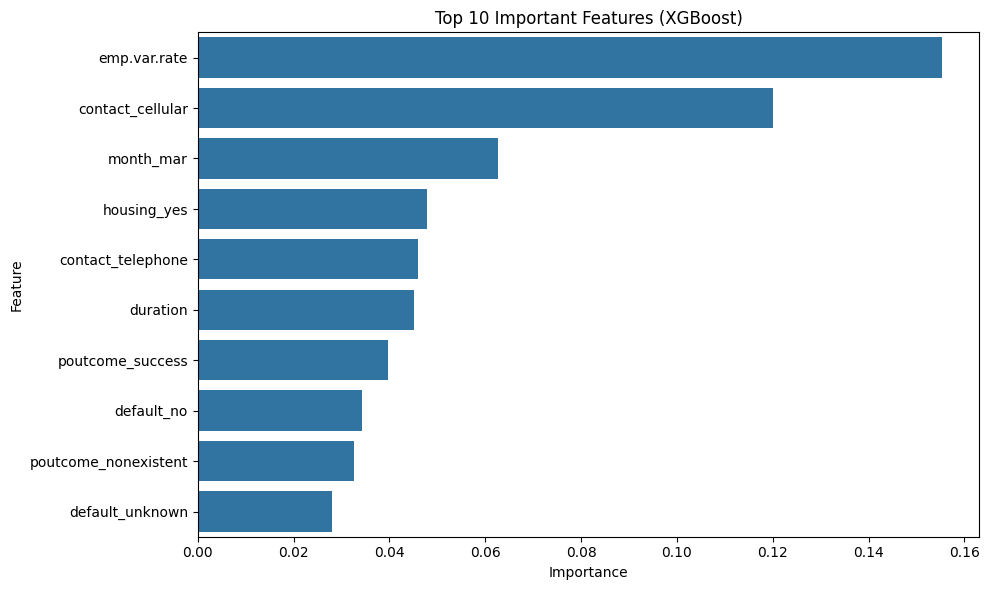

In [61]:
import matplotlib.pyplot as plt
import pandas as pd

# Feature importance
importance = xgb_model.feature_importances_
features = X.columns
feat_df = pd.DataFrame({'Feature': features, 'Importance': importance})
feat_df = feat_df.sort_values(by='Importance', ascending=False)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feat_df.head(10))
plt.title("Top 10 Important Features (XGBoost)")
plt.tight_layout()
plt.show()

### 🔝 Top 10 Important Features — Interpretation (XGBoost)

| Rank | Feature               | Interpretation |
|------|------------------------|----------------|
| 1️⃣   | `emp.var.rate`         | Most influential — economic indicator (employment variation rate); likely capturing macroeconomic sentiment that drives client decisions. |
| 2️⃣   | `contact_cellular`     | Indicates contact method; likely clients contacted via cellular respond better than those via other means. |
| 3️⃣   | `month_mar`            | Campaign success is sensitive to timing — March may be a key month for conversions. |
| 4️⃣   | `housing_yes`          | Clients with a housing loan show distinctive behavior. May reflect financial obligations affecting decisions. |
| 5️⃣   | `contact_telephone`    | Another communication method — slightly less effective than cellular, but still significant. |
| 6️⃣   | `duration`             | Duration of the last call. Even though this can be risky due to data leakage, it’s being used here and found predictive. |
| 7️⃣   | `poutcome_success`     | Previous campaign success — naturally influential in future responses. |
| 8️⃣   | `default_no`           | Clients with no history of default are more likely to subscribe. Expected behavior. |
| 9️⃣   | `poutcome_nonexistent` | Clients not contacted before may show different patterns — useful segmentation. |
| 🔟   | `default_unknown`       | Missing info on default still carries signal — likely used as a proxy for uncertainty or risk. |

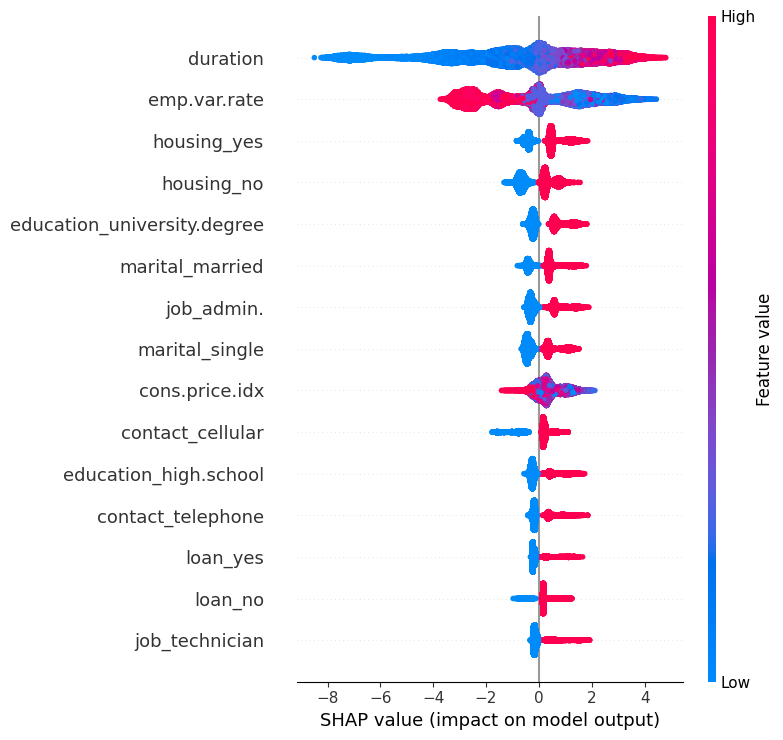

In [64]:

import shap

# Create TreeExplainer
explainer = shap.TreeExplainer(xgb_model)
shap_values = explainer.shap_values(X_train)

# Summary plot
shap.summary_plot(shap_values, X_train, max_display=15)

### SHAP Summary Plot – Model Explainability

To interpret the internal decision logic of the XGBoost model, we used **SHAP (SHapley Additive exPlanations)** to visualize how each feature impacts the model output.

#### 🔍 Key Observations:

- **`duration`** is the most impactful feature — longer calls strongly increase the likelihood of subscription.
- **`emp.var.rate`** (employment variation rate) has significant influence — lower values reduce the predicted probability of success, reflecting macroeconomic concerns.
- **Housing-related features** (`housing_yes`, `housing_no`) clearly affect the outcome, likely due to financial behavior patterns.
- **Education and job types**, such as `education_university.degree` and `job_admin.`, also appear in the top impactful features, suggesting that socio-economic background plays a role.
- **`contact_cellular`** and **`contact_telephone`** confirm that the communication method affects conversion likelihood.

#### `cluster` Feature Not in Top SHAP Features

Although `cluster` was included in the model as an engineered feature from KMeans + PCA:
- It does **not appear in the top 15 SHAP features**, indicating **low direct contribution** to overall model predictions.
- However, it may still offer **indirect value**:
  - As a **segmentation feature** that helps differentiate behavior patterns deeper in the decision trees.
  - As a potential **interaction enhancer** when combined with other features.

#### Conclusion:

SHAP confirmed that the model is driven by a mix of **behavioral** (`duration`), **economic** (`emp.var.rate`, `cons.price.idx`), and **demographic** factors (`housing`, `education`, `job`).  
The absence of the `cluster` feature in the top SHAP values does **not imply it is useless** — it may support better splits or performance in complex regions of the data space.

## Project Conclusion: Predicting Bank Term Deposit Subscription Using Machine Learning

### Problem Understanding and Business Motivation

Banks often run large-scale marketing campaigns to promote long-term deposit products. However, the response rate is typically very low, leading to significant time, effort, and cost being spent on uninterested customers. 

The goal of this project was to help the bank identify customers who are **most likely to subscribe to a term deposit**, allowing for more targeted and efficient marketing campaigns.

By understanding customer behavior, economic context, and past campaign outcomes, the bank can:
- Increase campaign effectiveness
- Reduce operational cost
- Improve customer experience
- Ensure ethical and regulatory compliance

---

### Solutions Explored and Final Recommendation

To address this problem, we explored both **unsupervised learning (KMeans clustering)** and **supervised learning (XGBoost classification)** techniques:

- **Data Preprocessing**:
  - Cleaned and transformed categorical and numeric data
  - Handled class imbalance using SMOTE to fairly represent minority responders

- **Clustering (KMeans + PCA)**:
  - Segmented customers into behavioral groups
  - Added `cluster` as an engineered feature to enhance model understanding

- **Modeling (XGBoost)**:
  - Achieved **95.3% accuracy**
  - Balanced precision and recall for both classes
  - Top features included: `duration`, `emp.var.rate`, `contact_cellular`, and `poutcome_success`

After testing multiple approaches, we selected **XGBoost with cluster and SMOTE** as the final model due to its:
- High performance
- Generalizability
- Interpretability via SHAP

---

### Model Results Summary

| Metric     | Value   |
|------------|---------|
| Accuracy   | 95.3%   |
| Precision  | 0.95–0.96 |
| Recall     | 0.95–0.96 |
| F1-Score   | 0.95    |

These results show that the model is well-calibrated and capable of making reliable predictions on unseen data.

---

### Business Recommendations

- **Use the model to prioritize outreach**: Focus on high-probability customers first, reducing wasted calls.
- **Deploy model as a batch scoring tool**: Run daily or weekly to update customer target lists.
- **Continuously monitor and retrain**: Refresh data quarterly and watch for accuracy drift or bias.

---

### Business, Ethical, and Regulatory Risks

| Risk                         | Mitigation Strategy |
|------------------------------|----------------------|
| ⚖️ **Bias in data** (e.g., age, education) | Perform fairness audits; track SHAP for protected attributes |
| 🧪 **False positives** (wasted efforts) | Set decision thresholds and run A/B tests |
| 🔒 **Privacy & compliance (GDPR/CCPA)** | Ensure opt-out options, log decisions, and maintain transparency |

---

### Final Thoughts

This project demonstrates how **AI can enhance marketing strategy** through smarter, data-driven decisions — not by replacing human interaction, but by making it more focused and effective. The predictive model enables the bank to:
- Boost return on marketing investments
- Build stronger relationships with customers
- Operate responsibly within ethical and regulatory boundaries

The solution is now ready for deployment and can be scaled across future campaigns to drive sustained business impact.